In [2]:
# Cargando librerias de utilidad
import random
import numpy as np
np.random.seed(42)
import csv
from stop_words import get_stop_words

In [3]:
sntcs_X_train=[]
y_train=[]
with open('../data/train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            sntcs_X_train.append(row[3])
            y_train.append(int(row[2]))      
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are ID, TOPIC, IS_IRONIC, MESSAGE
Processed 2401 lines.


In [4]:
stop_words = get_stop_words('es')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
tfidf_vect = TfidfVectorizer(min_df=5,max_df=0.95,stop_words=stop_words)
X_train_tfidf = tfidf_vect.fit_transform(sntcs_X_train)
print("Dimensiones", X_train_tfidf.shape)

Dimensiones (2400, 974)


In [8]:
# Calcula las matrices
lda = LatentDirichletAllocation(n_components=100, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(X_train_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=100, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [11]:
W=lda.fit_transform(X_train_tfidf)
H=lda.components_
print("W:",W.shape)
print("H:",H.shape)

W: (2400, 100)
H: (100, 974)


In [12]:
# Calcula los tòpicos
n_top_words = 20

def print_top_words(components,feature_names):
    for topic_idx, topic in enumerate(components):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-20 - 1:-1]])
        print(message)
    print()
    
print_top_words(H,tfidf_vect.get_feature_names())

Topic #0: patria capacidad amiguismo poder contrapeso puesto necesita presidente cargo así director significa tomar hacer risa dias gente mamás comisión quiere
Topic #1: dando miedo social asco periodista único mamen nueva noticias serio noticia 30 plana votaron tierra millones señor alguien saben política
Topic #2: hagan increíble ahorita gob espero peña maunieto mensaje población ningún notas bueno estancia significa señora frontera jodidos verdad nación periodista
Topic #3: si ser méxico mejor tierra va plana bien pueblo gobierno hacer bueno ver solo gente quiere personas amlo años venezuela
Topic #4: padierna inteligente nivel colombia críticos persona cualquier hizo pa socialismo necesitamos familia vea premio casi tiempo primer haciendo termino viva
Topic #5: estancia hacen funcionarios infantiles peor patria voto pasado risa izquierda hablar atole mientras gasolina podemos preocupe delincuentes acabo asi gana
Topic #6: da fin vida sexenio cuenta guerra mundo novela sabemos habla

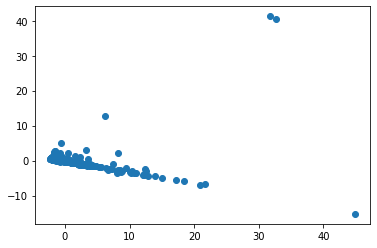

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
reduced_H = pca.fit_transform(H.T)
plt.scatter(reduced_H[:,0],reduced_H[:,1], cmap=plt.cm.Set1)
plt.show()

Tamaño de matrix X reducida: (2400, 2)


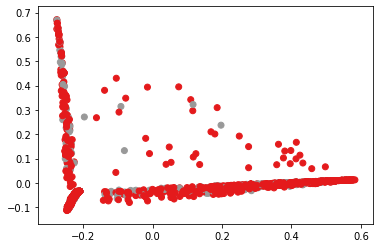

In [16]:
pca=PCA(n_components=2)
reduced_W = pca.fit_transform(W)
print("Tamaño de matrix X reducida:", reduced_W.shape)
plt.scatter(reduced_W[:,0],reduced_W[:,1],c=y_train,cmap=plt.cm.Set1)
plt.show()